In [2]:
# Import modules
import requests
import json
import pandas as pd
import operator
from IPython.display import Image

# 1.Gain data

## 1.1 Get data of restaruant in Massachusetts on Yelp

Use Yelp api

In [2]:
# Define a business ID
business_id = 'MEtw5bWj8rSYmFhJQQlmiw'
unix_time = 1546047836

# Define my API Key, My Endpoint, and My Header
API_KEY = 'O67naIw4n1PZGQ56l5DnPicefDlVxVNV79ppbHznpTVXQPDZY7LFX-sDoLaku9ZZkj8ukNQpLSawJqxgnC6XmJ1MbMhehJqzoLrxJAIDNmEaR8H_o1U9KQsiwn8wXnYx'
ENDPOINT = 'https://api.yelp.com/v3/businesses/search'.format(business_id)
HEADERS = {'Authorization': 'bearer %s' % API_KEY}

# Define my parameters of the search
PARAMETERS = {'term': 'restaruant',
              'location':'MA'}

# Make a request to the Yelp API
response = requests.get(url = ENDPOINT,
                        params = PARAMETERS,
                        headers = HEADERS)

# Conver the JSON String
restaruant_json = response.json()

# Print the response
print(json.dumps(restaruant_json, indent = 3))

{
   "businesses": [
      {
         "id": "G8mYHODB3zYw4RsSVebACw",
         "alias": "kala-thai-cookery-boston",
         "name": "Kala Thai Cookery",
         "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/fMFXJIMlSBHMme0a80ocQg/o.jpg",
         "is_closed": false,
         "url": "https://www.yelp.com/biz/kala-thai-cookery-boston?adjust_creative=MEtw5bWj8rSYmFhJQQlmiw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=MEtw5bWj8rSYmFhJQQlmiw",
         "review_count": 132,
         "categories": [
            {
               "alias": "thai",
               "title": "Thai"
            }
         ],
         "rating": 4.5,
         "coordinates": {
            "latitude": 42.36188,
            "longitude": -71.05676
         },
         "transactions": [
            "delivery"
         ],
         "location": {
            "address1": "151 Hanover St",
            "address2": null,
            "address3": null,
            "city": "Boston",
            "zip

In [3]:
# Define needed attributes and build a dataframe
restaurant_column = ['id','name','url','review_count','categories','price','rating','location','phone',]
restaurant_df = pd.DataFrame(restaruant_json['businesses'], columns = restaurant_column)
restaurant_df

,id,name,url,review_count,categories,price,rating,location,phone
0,G8mYHODB3zYw4RsSVebACw,Kala Thai Cookery,https://www.yelp.com/biz/kala-thai-cookery-bos...,132,"[{'alias': 'thai', 'title': 'Thai'}]",NaN,4.5,"{'address1': '151 Hanover St', 'address2': Non...",+18573504378
1,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$,4.5,"{'address1': '254 Newbury St', 'address2': Non...",+16174312284
2,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",$$,3.5,"{'address1': '65 Exeter St', 'address2': '', '...",+16179334800
3,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,"[{'alias': 'mexican', 'title': 'Mexican'}]",$,4.5,"{'address1': '291 Bennington St', 'address2': ...",+16175676367
4,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$$,4.5,"{'address1': '63 Salem St', 'address2': '', 'a...",+16177423474
5,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",$,3.0,"{'address1': '831 Main St', 'address2': None, ...",+17817886637
6,D3EMZKhkRqUQya20IGv7lg,Rod Thai Family Taste,https://www.yelp.com/biz/rod-thai-family-taste...,391,"[{'alias': 'thai', 'title': 'Thai'}]",$,4.0,"{'address1': '94 Peterborough St', 'address2':...",+16178590969
7,_98MfEQ67r9-V78gmy8_Pg,Grill 23 & Bar,https://www.yelp.com/biz/grill-23-and-bar-bost...,1026,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$$$,4.0,"{'address1': '161 Berkeley St', 'address2': ''...",+16175422255
8,xVJv__UZMNfW1O4oGUrvWw,Terramia Ristorante,https://www.yelp.com/biz/terramia-ristorante-b...,427,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",$$$,4.0,"{'address1': '98 Salem St', 'address2': '', 'a...",+16175233112
9,i9slSVVALR9WF2ej2o1jvw,Thai Place,https://www.yelp.com/biz/thai-place-allston-2?...,181,"[{'alias': 'thai', 'title': 'Thai'}]",$$,4.0,"{'address1': '184 Brighton Ave', 'address2': '...",+16177825732


In [4]:
# Send more requests to get more data. Maximum number of results to return by yelp API in one request is 50.
# Store data in the dataframe
# Show the dataframe

for i in range(1,19):
    PARAMETERS = {'term': 'restaurants',
              'limit': 50,
              'offset': 50*i,
              'location':'MA'}
    response = requests.get(url = ENDPOINT,
                        params = PARAMETERS,
                        headers = HEADERS)
    restaruant_json_temp = response.json()
    temp_df = pd.DataFrame(restaruant_json_temp['businesses'], columns = restaurant_column)
    restaurant_df = restaurant_df.append(temp_df,ignore_index = True)

restaurant_df

,id,name,url,review_count,categories,price,rating,location,phone
0,G8mYHODB3zYw4RsSVebACw,Kala Thai Cookery,https://www.yelp.com/biz/kala-thai-cookery-bos...,132,"[{'alias': 'thai', 'title': 'Thai'}]",NaN,4.5,"{'address1': '151 Hanover St', 'address2': Non...",+18573504378
1,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$,4.5,"{'address1': '254 Newbury St', 'address2': Non...",+16174312284
2,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",$$,3.5,"{'address1': '65 Exeter St', 'address2': '', '...",+16179334800
3,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,"[{'alias': 'mexican', 'title': 'Mexican'}]",$,4.5,"{'address1': '291 Bennington St', 'address2': ...",+16175676367
4,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$$,4.5,"{'address1': '63 Salem St', 'address2': '', 'a...",+16177423474
...,...,...,...,...,...,...,...,...,...
915,2ryBsj0YPSGfIBedQIWJgA,Shanti Indian Cuisine,https://www.yelp.com/biz/shanti-indian-cuisine...,381,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",$$,4.0,"{'address1': '1111 Dorchester Ave', 'address2'...",+16179293900
916,ZJw7_sCOfaUmib1Q0vBAZA,Jade Garden,https://www.yelp.com/biz/jade-garden-boston?ad...,225,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",$$,3.5,"{'address1': '18-20 Tyler St', 'address2': '',...",+16174233288
917,um4x6dIkv8w2a4e0VkRNmA,Rocco's Cucina & Bar,https://www.yelp.com/biz/roccos-cucina-and-bar...,159,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",$$,3.5,"{'address1': '450 Commercial St', 'address2': ...",+16175234055
918,8OlvNJkV6B4_h0GIijuuCw,Great Taste Bakery & Restaurant,https://www.yelp.com/biz/great-taste-bakery-an...,368,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",$,3.5,"{'address1': '63 Beach St', 'address2': '', 'a...",+16174268899


In [5]:
# Reformat 'location' column

list_temp = restaurant_df['location'].values.tolist()
dataframe_temp = pd.DataFrame(list_temp)
restaurant_df['address'] = dataframe_temp['address1']
restaurant_df['zip_code'] = dataframe_temp['zip_code']
restaurant_df['city'] = dataframe_temp['city']

del restaurant_df['location']

restaurant_df

,id,name,url,review_count,categories,price,rating,phone,address,zip_code,city
0,G8mYHODB3zYw4RsSVebACw,Kala Thai Cookery,https://www.yelp.com/biz/kala-thai-cookery-bos...,132,"[{'alias': 'thai', 'title': 'Thai'}]",NaN,4.5,+18573504378,151 Hanover St,02109,Boston
1,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$,4.5,+16174312284,254 Newbury St,02116,Boston
2,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",$$,3.5,+16179334800,65 Exeter St,02116,Boston
3,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,"[{'alias': 'mexican', 'title': 'Mexican'}]",$,4.5,+16175676367,291 Bennington St,02128,Boston
4,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$$,4.5,+16177423474,63 Salem St,02113,Boston
...,...,...,...,...,...,...,...,...,...,...,...
915,2ryBsj0YPSGfIBedQIWJgA,Shanti Indian Cuisine,https://www.yelp.com/biz/shanti-indian-cuisine...,381,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",$$,4.0,+16179293900,1111 Dorchester Ave,02125,Dorchester
916,ZJw7_sCOfaUmib1Q0vBAZA,Jade Garden,https://www.yelp.com/biz/jade-garden-boston?ad...,225,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",$$,3.5,+16174233288,18-20 Tyler St,02111,Boston
917,um4x6dIkv8w2a4e0VkRNmA,Rocco's Cucina & Bar,https://www.yelp.com/biz/roccos-cucina-and-bar...,159,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",$$,3.5,+16175234055,450 Commercial St,02109,Boston
918,8OlvNJkV6B4_h0GIijuuCw,Great Taste Bakery & Restaurant,https://www.yelp.com/biz/great-taste-bakery-an...,368,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",$,3.5,+16174268899,63 Beach St,02111,Boston


In [6]:
# Reformat 'categories' column

category_list_temp = restaurant_df['categories'].values.tolist()

for i in category_list_temp:
    for j in i:
        del j['title']

alias_list = []
for i in category_list_temp:
    alias_string = ''
    for j in i:
        alias_string = alias_string + ',' + j['alias']
    alias_list.append(alias_string[1:])

alias = {'category': alias_list}
alias_df = pd.DataFrame(alias)

restaurant_df['category'] = alias_df
del restaurant_df['categories']

restaurant_df

,id,name,url,review_count,price,rating,phone,address,zip_code,city,category
0,G8mYHODB3zYw4RsSVebACw,Kala Thai Cookery,https://www.yelp.com/biz/kala-thai-cookery-bos...,132,NaN,4.5,+18573504378,151 Hanover St,02109,Boston,thai
1,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,+16174312284,254 Newbury St,02116,Boston,"seafood,soup,sandwiches"
2,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,+16179334800,65 Exeter St,02116,Boston,"bars,newamerican,breakfast_brunch"
3,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,+16175676367,291 Bennington St,02128,Boston,mexican
4,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,+16177423474,63 Salem St,02113,Boston,"seafood,bars"
...,...,...,...,...,...,...,...,...,...,...,...
915,2ryBsj0YPSGfIBedQIWJgA,Shanti Indian Cuisine,https://www.yelp.com/biz/shanti-indian-cuisine...,381,$$,4.0,+16179293900,1111 Dorchester Ave,02125,Dorchester,"indpak,bangladeshi,asianfusion"
916,ZJw7_sCOfaUmib1Q0vBAZA,Jade Garden,https://www.yelp.com/biz/jade-garden-boston?ad...,225,$$,3.5,+16174233288,18-20 Tyler St,02111,Boston,"chinese,seafood,chicken_wings"
917,um4x6dIkv8w2a4e0VkRNmA,Rocco's Cucina & Bar,https://www.yelp.com/biz/roccos-cucina-and-bar...,159,$$,3.5,+16175234055,450 Commercial St,02109,Boston,"sportsbars,italian"
918,8OlvNJkV6B4_h0GIijuuCw,Great Taste Bakery & Restaurant,https://www.yelp.com/biz/great-taste-bakery-an...,368,$,3.5,+16174268899,63 Beach St,02111,Boston,"bakeries,dimsum,cantonese"


In [7]:
# Check if there are missing values

restaurant_df.isnull().any()

id              False
name            False
url             False
review_count    False
price            True
rating          False
phone           False
address         False
zip_code        False
city            False
category        False
dtype: bool

In [8]:
#delete recodes with missing values
restaurant_df = restaurant_df.dropna(axis=0, how ='any')

#check missing value again
restaurant_df.isnull().any()

id              False
name            False
url             False
review_count    False
price           False
rating          False
phone           False
address         False
zip_code        False
city            False
category        False
dtype: bool

In [9]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 919
Data columns (total 11 columns):
id              830 non-null object
name            830 non-null object
url             830 non-null object
review_count    830 non-null int64
price           830 non-null object
rating          830 non-null float64
phone           830 non-null object
address         830 non-null object
zip_code        830 non-null object
city            830 non-null object
category        830 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 77.8+ KB


## 1.2 Get reviews of each restaurant

Use Yelp api

In [10]:
id_list = restaurant_df['id'].values.tolist()
id_list

['JZUTavw4SsZ-iiExULq1_g',
 'DGlk1nTaaRE6uJFJbKv45A',
 'iQtGgTuPT7Zb_AHtLxl5sw',
 'y2w6rFaO0XEiG5mFfOsiFA',
 'OLQKQ6jp3Tzrr9-r7EU_fg',
 'D3EMZKhkRqUQya20IGv7lg',
 '_98MfEQ67r9-V78gmy8_Pg',
 'xVJv__UZMNfW1O4oGUrvWw',
 'i9slSVVALR9WF2ej2o1jvw',
 '-pK1SR3blPDEzYKwXk4L5Q',
 'Yw1vQd5U5GB6ZPqn2buhBg',
 'yg1onzPFULGaEFT81CBmeQ',
 'pWyR94wFtrJtd8Y7Ix2sQw',
 'vNlwe5I5XRhdF4S8NZkz0w',
 'omw2RVtNoMJ-Eet6Tvl_IA',
 'Ii-aCAM4KG6RCvpMn0hOkg',
 'VH0Ib9S3E-dxbQdQC4rffg',
 'e54WzrGWxuQBlABMCfM3DQ',
 'xFEyKgGkgOycAsJvVsUzVw',
 'ScslTjcxi4ubXOBiLfCOmg',
 'ly8RyiktGZwwVSAv6KZEtQ',
 'poswq7BdLM9Iryd9palDVQ',
 'WoI1IisL_AgmWdiJLRb-Zw',
 'V5r0E89VSK0IDzZRvrhc3g',
 '1C32E52HmhRC3GNwkX2nZg',
 'aGYdF_fNHDhFCAnXoTCkGA',
 'ez8T3NT5Icv2JFuUr_Qkfg',
 'bZhUufqdpg5qxsDKpIRv5A',
 'qVNYCZi2ofv-oe293JsYkg',
 'Ruq91rmQNweZ78TzKylQMg',
 'Q2dq9Eo1NMbD1k25Xx21TQ',
 'HEaQQAH6qyFXamKkpil91A',
 'MUup2lqjjX8JYvYjFCAAeA',
 'rcERANnIyyyanLU0t2qdKg',
 'Dvwj6KWrDZHVQwlSjYS4Iw',
 'p8ohzzGvGRCHnJKnyO7exA',
 'VH0Ib9S3E-dxbQdQC4rffg',
 

In [11]:
# Define attributes and build dataframe of review
review_column = ['id','rating','user','text','time_created']
review_df = pd.DataFrame(columns = review_column)

In [12]:
# Send request to Yelp api to get review information of the first restaurant in restaurant_df
ENDPOINT_review = 'https://api.yelp.com/v3/businesses/'+ id_list[0] +'/reviews'.format(business_id)
PARAMETERS = {'locale': 'en_US'}
response = requests.get(url = ENDPOINT_review,
                        params = PARAMETERS,
                        headers = HEADERS)
review_json = response.json()
review_temp_df = pd.DataFrame(review_json['reviews'], columns = review_column)
review_df = review_temp_df
id_temp_list = []
for j in range(review_temp_df.shape[0]):
    id_temp_list.append('G8mYHODB3zYw4RsSVebACw')
id_dic = {'restaruant_id': id_temp_list}
id_df = pd.DataFrame(id_dic)
review_df['restaruant_id'] = id_df

review_df

,id,rating,user,text,time_created,restaruant_id
0,wBf86eTka9mV-pArAmk0qw,5,"{'id': 'SS2lDcYYCuy1ZJo7SZ_pJw', 'profile_url'...",I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw
1,5f9qwicKUHGViAOpMRtTbA,4,"{'id': 'b6v08IXiat634wvPJ6FFxQ', 'profile_url'...",Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw
2,aKxmXNk3zVD9PnKzYEnahw,5,"{'id': 'aMoLI1v7eclKDZIAopR_FA', 'profile_url'...",I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw


In [13]:
# Use 'for' loop to get review information of all restaurant in restaurant_df

API_KEY = 'O67naIw4n1PZGQ56l5DnPicefDlVxVNV79ppbHznpTVXQPDZY7LFX-sDoLaku9ZZkj8ukNQpLSawJqxgnC6XmJ1MbMhehJqzoLrxJAIDNmEaR8H_o1U9KQsiwn8wXnYx'
HEADERS = {'Authorization': 'bearer %s' % API_KEY}
PARAMETERS = {'locale': 'en_US'}

for i in id_list[1:]:
    ENDPOINT_review = 'https://api.yelp.com/v3/businesses/'+ i +'/reviews'.format(business_id)
    response = requests.get(url = ENDPOINT_review,
                        params = PARAMETERS,
                        headers = HEADERS)
    review_json = response.json()
    review_temp_df = pd.DataFrame(review_json['reviews'], columns = review_column)
    id_temp_list = []
    for j in range(review_temp_df.shape[0]):
        id_temp_list.append(i)
    id_dic = {'restaruant_id': id_temp_list}
    id_df = pd.DataFrame(id_dic)
    review_temp_df['restaruant_id'] = id_df
    review_df = review_df.append(review_temp_df,ignore_index = True)

review_df

,id,rating,user,text,time_created,restaruant_id
0,wBf86eTka9mV-pArAmk0qw,5,"{'id': 'SS2lDcYYCuy1ZJo7SZ_pJw', 'profile_url'...",I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw
1,5f9qwicKUHGViAOpMRtTbA,4,"{'id': 'b6v08IXiat634wvPJ6FFxQ', 'profile_url'...",Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw
2,aKxmXNk3zVD9PnKzYEnahw,5,"{'id': 'aMoLI1v7eclKDZIAopR_FA', 'profile_url'...",I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw
3,OpDtxGcQqO22NPaGZKr0mA,4,"{'id': 'jOn_dLvX96AXgiFT4MBiEw', 'profile_url'...",I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A
4,h26gQuqKem_1YgXiGd695g,1,"{'id': 'KOyp9GNa6SzKz5WvQRlTfA', 'profile_url'...",Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A
...,...,...,...,...,...,...
2485,do86lZ7qdh7GvtZhywcLwA,2,"{'id': 'FqEF8lknxPne_dzZTi7RNA', 'profile_url'...",This place had great food but terrible service...,2020-01-11 14:45:14,8OlvNJkV6B4_h0GIijuuCw
2486,x5qoI2PJSlhiGH5BAZUFhQ,4,"{'id': 'MIJ6XeneTBYa7LiRDlTs8Q', 'profile_url'...",A decent place to get your dim sum fix.\n\nGra...,2019-12-28 15:58:07,8OlvNJkV6B4_h0GIijuuCw
2487,eVhd9m4DzxVrgE1fSkJVYg,4,"{'id': 'szNRP1PnxbNxnS1v9wen8Q', 'profile_url'...","Food was great! Loved every morsel, I had some...",2019-12-25 15:21:08,0AOdsO0aRRRlwxH_MGeoWg
2488,bpAhoVhNXvZSmIOkFMSYKg,2,"{'id': 'TPbPWOHCG_IQHmtAv8IEWg', 'profile_url'...",The service here leaves much to be desired. It...,2020-02-22 03:46:59,0AOdsO0aRRRlwxH_MGeoWg


In [14]:
# Reformat review_df

user_list_temp = review_df['user'].values.tolist()
user_df = pd.DataFrame(user_list_temp)
review_df['user_id'] = user_df['id']
review_df['user_name'] = user_df['name']
review_df['profile_url'] = user_df['profile_url']

del review_df['user']

review_df

,id,rating,text,time_created,restaruant_id,user_id,user_name,profile_url
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...
...,...,...,...,...,...,...,...,...
2485,do86lZ7qdh7GvtZhywcLwA,2,This place had great food but terrible service...,2020-01-11 14:45:14,8OlvNJkV6B4_h0GIijuuCw,FqEF8lknxPne_dzZTi7RNA,Allie D.,https://www.yelp.com/user_details?userid=FqEF8...
2486,x5qoI2PJSlhiGH5BAZUFhQ,4,A decent place to get your dim sum fix.\n\nGra...,2019-12-28 15:58:07,8OlvNJkV6B4_h0GIijuuCw,MIJ6XeneTBYa7LiRDlTs8Q,Chuu L.,https://www.yelp.com/user_details?userid=MIJ6X...
2487,eVhd9m4DzxVrgE1fSkJVYg,4,"Food was great! Loved every morsel, I had some...",2019-12-25 15:21:08,0AOdsO0aRRRlwxH_MGeoWg,szNRP1PnxbNxnS1v9wen8Q,Ama N.,https://www.yelp.com/user_details?userid=szNRP...
2488,bpAhoVhNXvZSmIOkFMSYKg,2,The service here leaves much to be desired. It...,2020-02-22 03:46:59,0AOdsO0aRRRlwxH_MGeoWg,TPbPWOHCG_IQHmtAv8IEWg,Izzy M.,https://www.yelp.com/user_details?userid=TPbPW...


In [15]:
# Check if there are missing values

review_df.isnull().any()

id               False
rating           False
text             False
time_created     False
restaruant_id    False
user_id          False
user_name        False
profile_url      False
dtype: bool

In [19]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 8 columns):
id               2490 non-null object
rating           2490 non-null int64
text             2490 non-null object
time_created     2490 non-null object
restaruant_id    2490 non-null object
user_id          2490 non-null object
user_name        2490 non-null object
profile_url      2490 non-null object
dtypes: int64(1), object(7)
memory usage: 155.8+ KB


## 1.3 Save data to csv file

In [16]:
# Save restaurant_df
outputpath='/Users/pc/Desktop/INFO6210/assignment2/restaurant_df.csv'
restaurant_df.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [57]:
# Save review_df
outputpath='/Users/pc/Desktop/INFO6210/assignment2/review_df.csv'
review_df.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

# 2. Database normalization

## 2.1 Import data

In [90]:
# import 'restaurant_df.csv'

restaurant = pd.read_csv("restaurant_df.csv")
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,zip_code,city,category
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,1.617431e+10,254 Newbury St,2116,Boston,"seafood,soup,sandwiches"
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,1.617933e+10,65 Exeter St,2116,Boston,"bars,newamerican,breakfast_brunch"
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,1.617568e+10,291 Bennington St,2128,Boston,mexican
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,1.617742e+10,63 Salem St,2113,Boston,"seafood,bars"
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,1.781789e+10,831 Main St,2451,Waltham,"mexican,tex-mex"


In [91]:
# Reformat 'zipcode' column

restaurant['zip_code'] = restaurant['zip_code'].astype('str')
zipcode = []
for i in restaurant['zip_code']:
    zipcode.append('0'+i)

zipcode_dict = {'zipcode':zipcode}
zipcode_df = pd.DataFrame(zipcode_dict)

restaurant['zipcode'] = zipcode_df

del restaurant['zip_code']
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,city,category,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,1.617431e+10,254 Newbury St,Boston,"seafood,soup,sandwiches",02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,1.617933e+10,65 Exeter St,Boston,"bars,newamerican,breakfast_brunch",02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,1.617568e+10,291 Bennington St,Boston,mexican,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,1.617742e+10,63 Salem St,Boston,"seafood,bars",02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,1.781789e+10,831 Main St,Waltham,"mexican,tex-mex",02451


In [92]:
# if there are null values, drop them
restaurant = restaurant.dropna(axis=0,how = 'any')

In [93]:
# Reformat 'phone' column

phone_list_temp = restaurant['phone'].values.tolist()
phone_str_list = []
for i in phone_list_temp:
    temp = str(i)
    phone_str_list.append(temp[:-2])
phone_df = pd.DataFrame({'phone_number':phone_str_list})
restaurant['phone'] = phone_df
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,city,category,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,"seafood,soup,sandwiches",02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,Boston,"bars,newamerican,breakfast_brunch",02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,16175676367,291 Bennington St,Boston,mexican,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,16177423474,63 Salem St,Boston,"seafood,bars",02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,17817886637,831 Main St,Waltham,"mexican,tex-mex",02451


In [94]:
# import 'review_df.csv'

review = pd.read_csv("review_df.csv")
review.head()

,id,rating,text,time_created,restaruant_id,user_id,user_name,profile_url
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...


## 2.2 First normal form (1NF)

Each table has a primary key: minimal set of attributes which can uniquely identify a record.<br />
The values in each column of a table are atomic (No multi-value attributes allowed).<br />
There are no repeating groups: two columns do not store similar information in the same table.<br />

### 2.2.1 Reformat 'restaurant' into 1NF

In [95]:
# Check the primary key is unique or not
restaurant['id'].is_unique

False

In [96]:
# delete duplicate 'id'
restaurant = restaurant.drop_duplicates(subset = 'id',keep = 'first')
#reset index
restaurant = restaurant.reset_index(drop = True)
# check 'id' is unique or nor again
restaurant['id'].is_unique

True

In [97]:
# Column 'category' has multi-value. Convert this column into another table.
df1 = restaurant['category'].str.split(',',expand = True).stack()
df1 = df1.reset_index(level = 1,drop=True).rename('category_temp')
df2 = restaurant
df2.join(df1)

,id,name,url,review_count,price,rating,phone,address,city,category,zipcode,category_temp
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,"seafood,soup,sandwiches",02116,seafood
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,"seafood,soup,sandwiches",02116,soup
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,"seafood,soup,sandwiches",02116,sandwiches
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,Boston,"bars,newamerican,breakfast_brunch",02116,bars
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,Boston,"bars,newamerican,breakfast_brunch",02116,newamerican
...,...,...,...,...,...,...,...,...,...,...,...,...
795,8OlvNJkV6B4_h0GIijuuCw,Great Taste Bakery & Restaurant,https://www.yelp.com/biz/great-taste-bakery-an...,368,$,3.5,NaN,63 Beach St,Boston,"bakeries,dimsum,cantonese",02111,dimsum
795,8OlvNJkV6B4_h0GIijuuCw,Great Taste Bakery & Restaurant,https://www.yelp.com/biz/great-taste-bakery-an...,368,$,3.5,NaN,63 Beach St,Boston,"bakeries,dimsum,cantonese",02111,cantonese
796,0AOdsO0aRRRlwxH_MGeoWg,Suya Joint All African Cuisine,https://www.yelp.com/biz/suya-joint-all-africa...,94,$$,3.5,NaN,185 Dudley St,Roxbury,"african,wine_bars,cocktailbars",02119,african
796,0AOdsO0aRRRlwxH_MGeoWg,Suya Joint All African Cuisine,https://www.yelp.com/biz/suya-joint-all-africa...,94,$$,3.5,NaN,185 Dudley St,Roxbury,"african,wine_bars,cocktailbars",02119,wine_bars


In [98]:
# Build category table
df3 = df2.join(df1)[['id','category_temp']]
category_object = df3['category_temp']
# delete duplicate category
category_object = category_object.drop_duplicates(keep = 'first')
#reset index
category_object = category_object.reset_index(drop = True)

category_list = []
for i in category_object:
    category_list.append(i)

category_id = []
k = 1
for i in range(len(category_list)):
    category_id.append(k)
    k = k + 1

category_dict = {'category_id' : category_id,
                 'category_name' : category_list}

category = pd.DataFrame(category_dict)

category

,category_id,category_name
0,1,seafood
1,2,soup
2,3,sandwiches
3,4,bars
4,5,newamerican
...,...,...
150,151,panasian
151,152,donuts
152,153,kebab
153,154,dominican


In [99]:
# Check is there any missing value in  'category'
category.isna().any()

category_id      False
category_name    False
dtype: bool

In [100]:
# Check the primary kay in 'category' is unique or not
category['category_id'].is_unique

True

In [101]:
# Create 'restaurant_category' table

id_list = []
for i in df3['id']:
    id_list.append(i)

category_list = []
for i in df3['category_temp']:
    category_list.append(i)

restaurant_category_dict = {'restaurant_id':id_list,
                            'category_name':category_list}

restaurant_category_temp = pd.DataFrame(restaurant_category_dict)
restaurant_category = pd.merge(restaurant_category_temp,category,on='category_name',how='left',sort= False)
restaurant_category
restaurant_category = restaurant_category.drop(['category_name'],axis = 1)
restaurant_category

,restaurant_id,category_id
0,JZUTavw4SsZ-iiExULq1_g,1
1,JZUTavw4SsZ-iiExULq1_g,2
2,JZUTavw4SsZ-iiExULq1_g,3
3,DGlk1nTaaRE6uJFJbKv45A,4
4,DGlk1nTaaRE6uJFJbKv45A,5
...,...,...
1734,8OlvNJkV6B4_h0GIijuuCw,64
1735,8OlvNJkV6B4_h0GIijuuCw,44
1736,0AOdsO0aRRRlwxH_MGeoWg,120
1737,0AOdsO0aRRRlwxH_MGeoWg,11


In [102]:
# Check is there any missing value in  'restaurant_category'
restaurant_category.isna().any()

restaurant_id    False
category_id      False
dtype: bool

In [103]:
# Check the primary kay in 'restaurant_category' is unique or not
judge = restaurant_category.duplicated()
k = 0
for i in judge:
    if i == False:
        k = k+1
    else:
        print('the primary kay in restaurant_category is not unique')
        break

if k == 1739:
    print('the primary kay in restaurant_category is unique')

the primary kay in restaurant_category is unique


### 2.2.2 Reformat 'review' into 1NF

In [104]:
# Check the primary key is unique or not
review['id'].is_unique

False

In [105]:
# delete duplicate 'id'
review = review.drop_duplicates(subset = 'id',keep = 'first')
#reset index
review = review.reset_index(drop = True)
# check 'id' is unique or nor again
review['id'].is_unique

True

### 2.2.3 Show all tables in 1NF

In [106]:
# Show head of 'restaurant'
del restaurant['category']
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,city,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,Boston,02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,16175676367,291 Bennington St,Boston,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,16177423474,63 Salem St,Boston,02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,17817886637,831 Main St,Waltham,02451


In [107]:
# Show head of 'category'
category.head()

,category_id,category_name
0,1,seafood
1,2,soup
2,3,sandwiches
3,4,bars
4,5,newamerican


In [108]:
# Show head of 'restaurant_category'
restaurant_category.head()

,restaurant_id,category_id
0,JZUTavw4SsZ-iiExULq1_g,1
1,JZUTavw4SsZ-iiExULq1_g,2
2,JZUTavw4SsZ-iiExULq1_g,3
3,DGlk1nTaaRE6uJFJbKv45A,4
4,DGlk1nTaaRE6uJFJbKv45A,5


In [109]:
# Show head of 'review'
review.head()

,id,rating,text,time_created,restaruant_id,user_id,user_name,profile_url
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...


## 2.3 Second normal form (2NF)

All requirements for 1st NF must be met.<br />
No partial dependencies.<br />
No calculated data.<br />

### 2.3.1 Reformat 'review' into 2NF

In [110]:
# 'user_name' and 'profile_url' is dependent on 'user_id', so take these columns out to form a new table 'user'.
user = review[['user_id','user_name','profile_url']]
user.head()

,user_id,user_name,profile_url
0,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...


### 2.3.2 Show all tables in 2NF

In [111]:
# Show restaurant
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,city,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,Boston,02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,Boston,02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,16175676367,291 Bennington St,Boston,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,16177423474,63 Salem St,Boston,02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,17817886637,831 Main St,Waltham,02451


In [112]:
# Show 'category'
category.head()

,category_id,category_name
0,1,seafood
1,2,soup
2,3,sandwiches
3,4,bars
4,5,newamerican


In [113]:
# Show 'restaurant_category'
restaurant_category.head()

,restaurant_id,category_id
0,JZUTavw4SsZ-iiExULq1_g,1
1,JZUTavw4SsZ-iiExULq1_g,2
2,JZUTavw4SsZ-iiExULq1_g,3
3,DGlk1nTaaRE6uJFJbKv45A,4
4,DGlk1nTaaRE6uJFJbKv45A,5


In [114]:
# Show 'review'
del review['user_name']
del review['profile_url']
review.head()

,id,rating,text,time_created,restaruant_id,user_id
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA


In [115]:
# Show 'user'
user.head()

,user_id,user_name,profile_url
0,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...


## 2.4 Third normal form (3NF)

All requirements for 2nd NF must be met.<br />
Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies.<br />

### 2.4.1 Reformat 'restaurant' into 3NF

In [116]:
# In table 'restaurant', there is an indirect relationship between 'id' and 'city' : 'id' -> 'zipcode', 'zipcode' -> 'city'. 
# So, the table 'restaurant' is not in the 3NF.

city = restaurant[['zipcode','city']]
city = city.drop_duplicates(subset = 'zipcode',keep='first')
city.head()

,zipcode,city
0,02116,Boston
2,02128,Boston
3,02113,Boston
4,02451,Waltham
5,02215,Boston


In [117]:
# Check if there is any missing value in 'city'
city.isnull().any()

zipcode    False
city       False
dtype: bool

In [118]:
# Check if the primary key is unique or not
city['zipcode'].is_unique

True

### 2.4.2 Show and save all table in 3NF

In [119]:
# Save 'restaurant'
del restaurant['city']
outputpath='/Users/pc/Desktop/INFO6210/assignment2/restaurant.csv'
restaurant.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [120]:
# Show 'restaurant'
restaurant.head()

,id,name,url,review_count,price,rating,phone,address,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,16175676367,291 Bennington St,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,16177423474,63 Salem St,02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,17817886637,831 Main St,02451


In [121]:
# Save 'category'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/category.csv'
category.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [122]:
# Show 'category'
category.head()

,category_id,category_name
0,1,seafood
1,2,soup
2,3,sandwiches
3,4,bars
4,5,newamerican


In [123]:
# Save 'restaurant_category'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/restaurant_category.csv'
restaurant_category.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [124]:
# Show 'restaurant_category'
restaurant_category.head()

,restaurant_id,category_id
0,JZUTavw4SsZ-iiExULq1_g,1
1,JZUTavw4SsZ-iiExULq1_g,2
2,JZUTavw4SsZ-iiExULq1_g,3
3,DGlk1nTaaRE6uJFJbKv45A,4
4,DGlk1nTaaRE6uJFJbKv45A,5


In [134]:
# Save 'city'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/city.csv'
city.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [126]:
# Show 'city'
city.head()

,zipcode,city
0,02116,Boston
2,02128,Boston
3,02113,Boston
4,02451,Waltham
5,02215,Boston


In [127]:
# Save 'review'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/review.csv'
review.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [128]:
# Show 'review'
review.head()

,id,rating,text,time_created,restaruant_id,user_id
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA


In [129]:
# Save 'user'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/user.csv'
user.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [130]:
# Show 'user'
user.head()

,user_id,user_name,profile_url
0,SS2lDcYYCuy1ZJo7SZ_pJw,Frieda R.,https://www.yelp.com/user_details?userid=SS2lD...
1,b6v08IXiat634wvPJ6FFxQ,Mandy L.,https://www.yelp.com/user_details?userid=b6v08...
2,aMoLI1v7eclKDZIAopR_FA,Ashley K.,https://www.yelp.com/user_details?userid=aMoLI...
3,jOn_dLvX96AXgiFT4MBiEw,Marissa R.,https://www.yelp.com/user_details?userid=jOn_d...
4,KOyp9GNa6SzKz5WvQRlTfA,Shaquille A.,https://www.yelp.com/user_details?userid=KOyp9...


# 3. E-R Diagram

## 3.1 UML Model

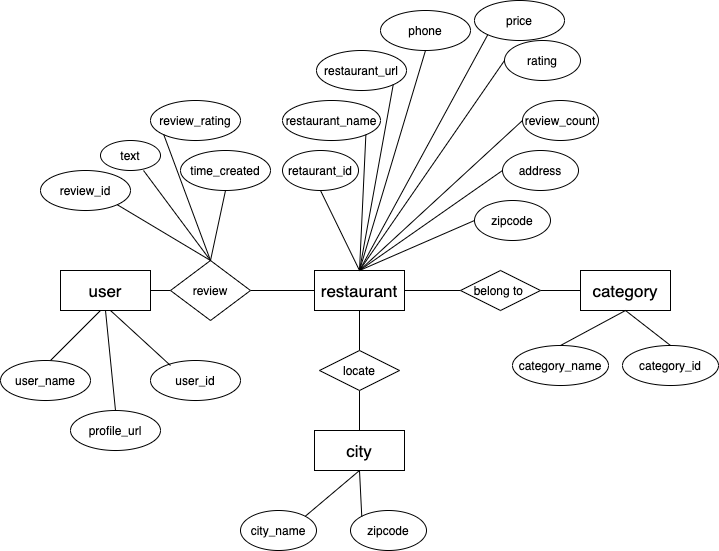

In [4]:
Image("/Users/pc/Desktop/INFO6210/assignment2/uml_model.png")

## 3.2 Conceptual Model

Conceptual ERD models information gathered from business requirements. Entities and relationships modeled in such ERD are defined around the business's need. The need of satisfying the database design is not considered yet. The main aim of this model is to establish the entities, their attributes, and their relationships.

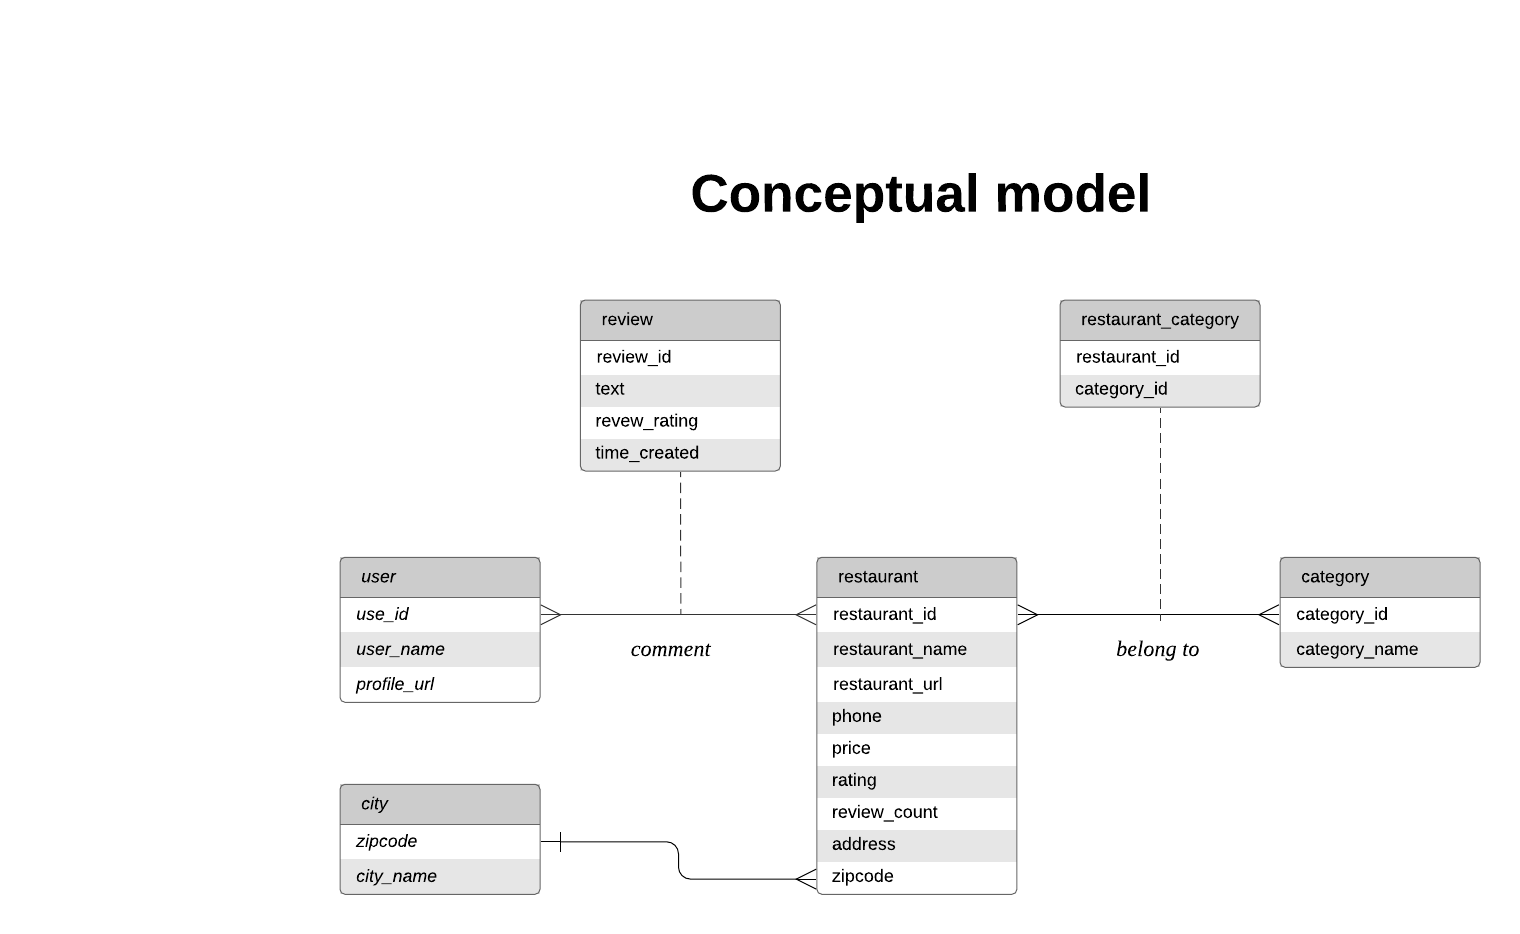

In [3]:
Image("/Users/pc/Desktop/INFO6210/assignment2/conceptual_model.png")

## 3.3 Physical Model

Physical ERD represents the actual design blueprint of a relational database. It represents how data should be structured and related in a specific DBMS so it is important to consider the convention and restriction of the DBMS you use when you are designing a physical ERD. This means that an accurate use of data type is needed for entity columns and the use of reserved words has to be avoided in naming entities and columns. Besides, database designers may also add primary keys, foreign keys and constraints to the design.

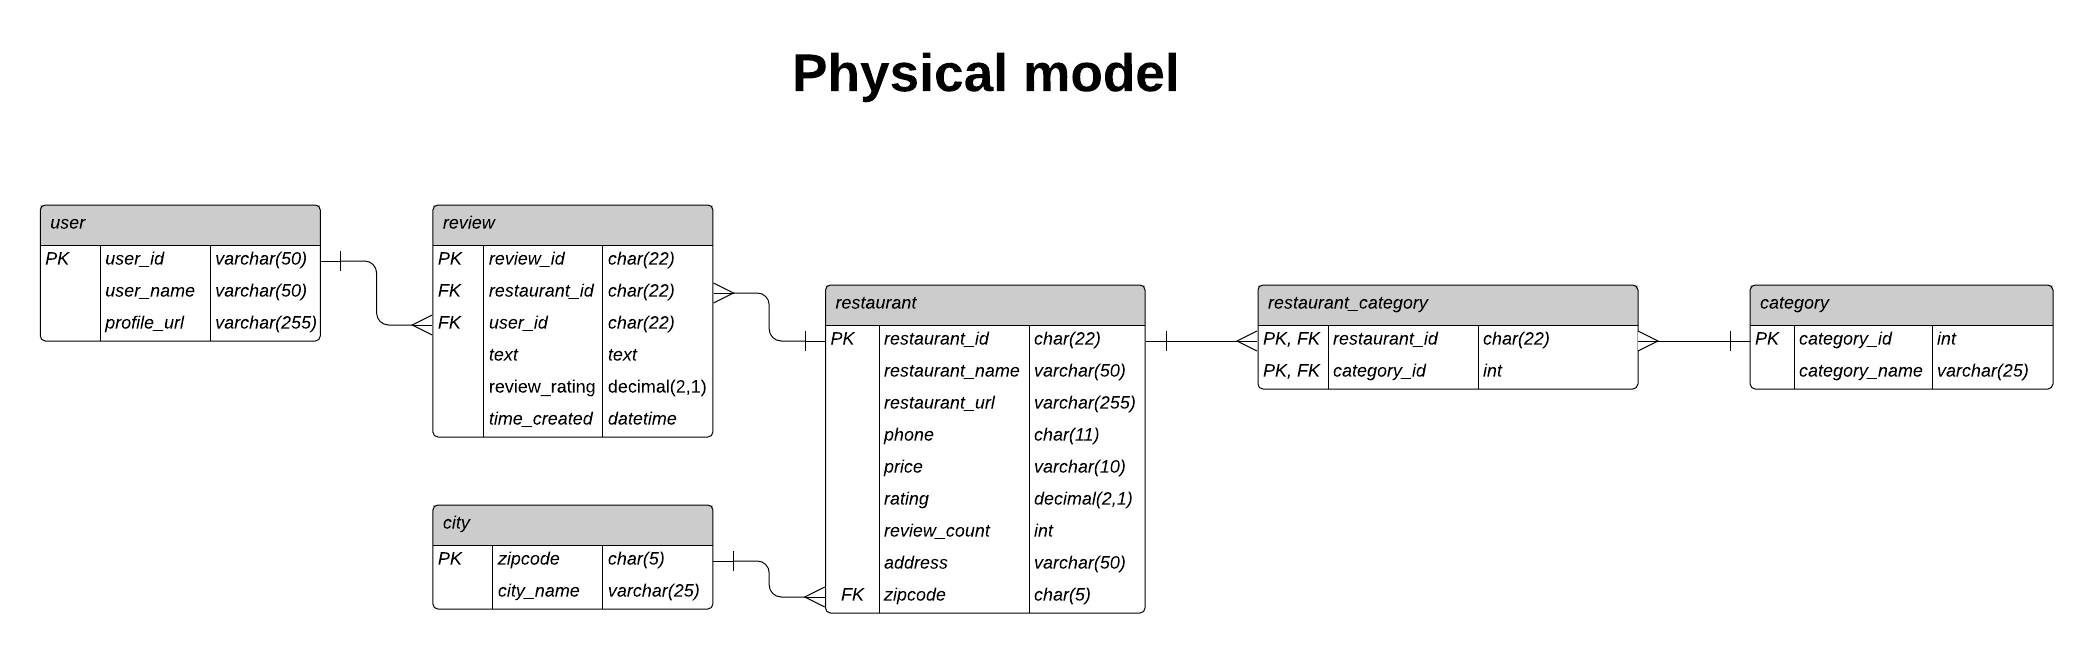

In [133]:
Image("/Users/pc/Desktop/INFO6210/assignment2/physical_model.png")

## 3.4 Reformat data to fit Pysical Model

In [137]:
# Update the column name of 'restaurant'
restaurant.columns = ['restaurant_id','restaurant_name','restaurant_url','review_count','price','rating','phone','address','zipcode']
restaurant.head()

,restaurant_id,restaurant_name,restaurant_url,review_count,price,rating,phone,address,zipcode
0,JZUTavw4SsZ-iiExULq1_g,Lobstah On A Roll,https://www.yelp.com/biz/lobstah-on-a-roll-bos...,22,$$,4.5,16174312284,254 Newbury St,02116
1,DGlk1nTaaRE6uJFJbKv45A,City Table,https://www.yelp.com/biz/city-table-boston?adj...,289,$$,3.5,16179334800,65 Exeter St,02116
2,iQtGgTuPT7Zb_AHtLxl5sw,Taqueria Jalisco,https://www.yelp.com/biz/taqueria-jalisco-bost...,315,$,4.5,16175676367,291 Bennington St,02128
3,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,https://www.yelp.com/biz/neptune-oyster-boston...,5008,$$$,4.5,16177423474,63 Salem St,02113
4,OLQKQ6jp3Tzrr9-r7EU_fg,Moe's Southwest Grill,https://www.yelp.com/biz/moes-southwest-grill-...,88,$,3.0,17817886637,831 Main St,02451


In [138]:
# Update 'restaurant.csv'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/restaurant.csv'
restaurant.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

In [139]:
# Update the column name of 'review'
review.columns = ['review_id','review_rating','text','time_created','restaurant_id','user_id']
review.head()

,review_id,review_rating,text,time_created,restaurant_id,user_id
0,wBf86eTka9mV-pArAmk0qw,5,I wanted an iconic Boston lobster roll made wi...,2020-02-19 17:45:28,G8mYHODB3zYw4RsSVebACw,SS2lDcYYCuy1ZJo7SZ_pJw
1,5f9qwicKUHGViAOpMRtTbA,4,Really had to sit on this rating. Interesting ...,2019-12-22 11:59:27,G8mYHODB3zYw4RsSVebACw,b6v08IXiat634wvPJ6FFxQ
2,aKxmXNk3zVD9PnKzYEnahw,5,I was revisiting Boston for a brief trip and h...,2019-11-26 11:34:54,G8mYHODB3zYw4RsSVebACw,aMoLI1v7eclKDZIAopR_FA
3,OpDtxGcQqO22NPaGZKr0mA,4,I came here in a large group for breakfast and...,2020-02-03 11:39:13,DGlk1nTaaRE6uJFJbKv45A,jOn_dLvX96AXgiFT4MBiEw
4,h26gQuqKem_1YgXiGd695g,1,Came here for breakfast today and did not have...,2019-12-21 12:24:47,DGlk1nTaaRE6uJFJbKv45A,KOyp9GNa6SzKz5WvQRlTfA


In [140]:
# Update 'review.csv'
outputpath='/Users/pc/Desktop/INFO6210/assignment2/review.csv'
review.to_csv(outputpath,sep=',',index=False,encoding = 'utf-8',header=True)

# 4. Report

## 4.1 Questions about conceptual model

### (1) What are the ranges, data types and format of all of the attributes in your entities?

1. entity 'restaurant':
   * restaurant_id : char(22), e.g.JZUTavw4SsZ-iiExULq1_g
   * restaurant_name : varchar(50), e.g.Lobstah On A Roll
   * restaurant_url : varchar(255), e.g.https://www.yelp.com/biz/lobstah-on-a-roll-boston-2?adjust_creative=MEtw5bWj8rSYmFhJQQlmiw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=MEtw5bWj8rSYmFhJQQlmiw![image.png](attachment:image.png)
   * phone : char(11), e.g.16174312284
   * price: varchar(10), e.g.$
   * rating : decimal(2,1), range from 0.0 to 5.5, e.g.3.5
   * review_count : int, e.g.22
   * address : varchar(50), e.g.254 Newbury St
   * zipcode : char(5), e.g.02116
<br />
<br />
2. entity 'categoty':
   * category_id: int, range from 1 to 155, e.g.5
   * category_name: varchar(25), e.g.seafood
<br />
<br />
3. entity 'restaurant_category':
   * restaurant_id : char(22), e.g.JZUTavw4SsZ-iiExULq1_g
   * category_id : int, e.g.5
<br />
<br />
4. entity 'city':
   * zipcode : char(5), e.g.02116
   * city_name : varchar(25), e.g.Boston
<br />
<br />
5. entity 'review':
   * review_id : char(22), e.g.wBf86eTka9mV-pArAmk0qw
   * review_rating : decimal(2,1), e.g.4.0
   * text : text, e.g.I wanted an iconic Boston lobster roll made with butter, and I got exactly that here!
   * time_created : datatime, e.g.2/19/2020  17:45:28
   * restaurant_id : char(22), e.g.JZUTavw4SsZ-iiExULq1_g
   * user_id : char(22), e.g.SS2lDcYYCuy1ZJo7SZ_pJw
<br />
<br />
6. entity 'user:
   * user_id : char(22), e.g.SS2lDcYYCuy1ZJo7SZ_pJw
   * user_name : varchar(50), e.g.Frieda R.
   * profile_url : varchar(225), e.g.https://www.yelp.com/user_details?userid=SS2lDcYYCuy1ZJo7SZ_pJw

### (2) When should you use an entity versus attribute? (Example: address of a person could be modeled as either)

It depends on how we want to use the information. When the partial dependency exists, we should take the attribute out and model it as an attribute. Take address as an example. When we have an address per employee, address can be an attribute. But when we have several address per employee, address should be an entity. And when the structure of address, such as city, street, is important, address should be modeled as an entity.

### (3) When should you use an entity or relationship, and placement of attributes? (Example: a manager could be modeled as either)

Entity is a real-world object, such as employee. An entity type typically corresponds to one or several related tables in database. An attribute is characteristic or trait of an entity. Attributes are used to describe the entity. For example, salary is an attribute of employee. A relationship is the association that describes the interaction between entities. In general, there may be one-to-one, one-to-many, or many-to-many relationships. When the many-to-many relationships exists, we should model the relation as an associated entity in the physical model.

### (4) How did you choose your keys? Which are unique?

The key chosen has to be unique. And it can not has null values. Unique means that based on a key value, we can find only one record (row) in the table.

### (5) Did you model hierarchies using the “ISA” design element? Why or why not?

No. Because 'ISA' hierarchy is used to present specialization. It is a top - down approach in which one higher level entity can be broken down into lower level entities. And the lower level entities share the attributes that the higher level entity has. For example, an bank account can be broken down into check account and saving account. But in my model, there isn't any entity that can use 'ISA' design element.

### (6) Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs. relationship, binary vs. ternary relationships?

Design is depend on the purpose of building a database and the relationship between entities. Some attributes of the entity can be changed if the change will not effect the Normal From of table. An entity can not be changed to be an attibutes and also an attribute can not be changed to be an entity if the model is well designed. In my model, all entities and attributes can not be changed, especially associated entity 'review' and 'restaurant_category'.

Trade-off:<br />
entity vs attribute : decision on using an entity or an attributes is totally depend on how we want to use this information. And if there is partial depandency and transitive dependency when we model it as an attribute, we should use the entity instead.<br />
entity vs relationship : the main difference between entity and relationship in DBMS is that entity is a real-world object while the relationship is an association between the entities. For example, student and course are two entities, and 'students participate courses' is a relationship.<br />
binary vs ternary relationship : binary relationship means that two entities are involved in the relationship and ternary relationship means that three entities are involved in the relationship.

### (7) Where are you going find real-world data populate your model?

I get my data by Yelp api to populate my model. The Yelp Fusion API allows users to get the best local content and user reviews from millions of businesses across 32 countries. In order to get basic information about restaurants, I sent requests to 'Business Endpoint - Business Search' in Yelp fusion. And information about reviews is obtained from 'Business Endpoint - Reviews'.

## 4.2 Questions about physical model

### (1) Are all the tables in 1NF?

Yes. After reformatting data in part 2.2, I get 4 tables: 'restaurant', 'category', 'restaurant_category', 'review'. All these tables I get satisfy the requirement of First Normal Form. Each table has a primary key. The values in each column of a table are atomic. And there are no repeating groups. Detail proof can be seen in part 2.2.

### (2) Are all the tables in 2NF?

Yes. After reformatting data in part 2.3, I get 5 tables: 'restaurant', 'category', 'restaurant_category', 'review','user'. All these tables I get satisfy the requirement of Second Normal Form. Every table has met the requirements for 1NF. There isn't any partial dependencies and calculated data in each table. Detail proof can be seen in part 2.3.

### (3) Are all the tables in 3NF?

Yes. After reformatting data in part 2.4, I get 6 tables: 'restaurant', 'category', 'restaurant_category', 'city', 'review','user'. All these tables I get satisfy the requirement of Third Normal Form. Every table has met the requirements for 2NF. There isn't any transitive dependencies in each table. Detail proof can be seen in part 2.4.

## 4.3 Code and results in this assignment

1. Use Yelp api to gain data about restaurants and reviews
   * Use Yelp API KEY to access the Yelp website to request information.
   * Use json to convert data into json format.
   * Use pandas to convert data into dataframe format.
   * Use 'for' loop to get more data. 
   * Clean and process the data to fit in the attributes I need.
   * Audit the data: check if there is duplicate or missing values.
   * Save data into a csv file.<br /><br />
   RESULT
   * 2 csv files: restaurant_df.csv, review_df.csv
   * 830 entries in restaurant_df.csv
   * 2490 entries in review_df.csv<br /><br />
2. Reformat tables into 1NF, 2NF, 3NF
   * Reformat tables to meet the requirements of 1NF
   * Reformat tables to meet the requirements of 2NF
   * Reformat tables to meet the requirements of 3NF
   * Save tables into csv files<br /><br />
   RESULT
   * 6 csv files: restaurant.csv, restaurant_category.csv, category.csv, city.csv, review.csv, user.csv
   * All tables are in 3NF.<br /><br />
3. Show conceptual model and physical model, and fit data to physical model
   * Import conceptual model
   * Import physical model
   * fit data to physical model<br /><br />
   RESULT
   * Get conceptual model
   * Get physical model
   * All tables fit physical model

## 4.4 Files in this assignment

1. restaurant_df.csv : Data I get about restaurant in MA by using Yelp api. Store data about restaurant_id, restaurant_name, restaurant_url, review_count, price, rating, phone, address, zipcode, city, category.<br />
2. review_df.csv : Data i get about reviews of restaurants. Store data about review_id, review_rating, text, time_created, restaurant_id, user_id, user_name, profile_url.<br />
<br />
3. restaurant.csv : data of entity 'restaurant'.<br />
4. restaurant_category.csv : data of entity 'restaurant_category'.<br />
5. category.csv : data of entity 'category'.<br />
6. city.csv : data of entity 'city'.<br />
7. review.csv : data of entity 'review'.<br />
8. user.csv : data of entity 'user'.<br />

# 5. Audit

## 5.1 Audit Validity / Accuracy

Data in all tables is accurate, neat and with no null or junk values.

## 5.2 Audit Completeness

The purpose of building a restaurant database is to help customers get information of restaurant. All data I have can meet this purpose well.

## 5.3 Audit Consistency / Uniformity


The dataset used in this assignment show a uniform relationship between each of the dataset since they are linked to each other by a common attribute. The names of different entity are in the same format. The same attributes in different datasets have the same names and types.

# 6. Professionalism

## 6.1 Contribution

I contributed By Own: 80% <br />
By External source: 10% <br />
Provided by the professor : 10% <br />

## 6.2 Citation

1. https://www.1keydata.com/datawarehousing/data-modeling-levels.html
2. https://www.visual-paradigm.com/support/documents/vpuserguide/3563/3564/85378_conceptual,l.html

## 6.3 License

Copyright 2020 Yue Pang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.